In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [2]:
import pandas as pd

# Specify the file name you uploaded
file_name = "/content/drive/MyDrive/sms_spam.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

In [3]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename(columns={'type':'label','text':'message'},inplace=True)
print(df)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


In [5]:
df.shape

(5574, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

414

In [9]:
df=df.drop_duplicates(keep='first')

In [10]:
df.describe()

,label,message
count,5160,5160
unique,2,5160
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4518,1


In [11]:
df['label'].value_counts()

ham     4518
spam     642
Name: label, dtype: int64

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
df['length'] = df['message'].apply(len)
df['word_count'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1).apply(len)
df['sentence_count'] = df.apply(lambda row: nltk.sent_tokenize(row['message']), axis=1).apply(len)

In [14]:
df.head()

,label,message,length,word_count,sentence_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


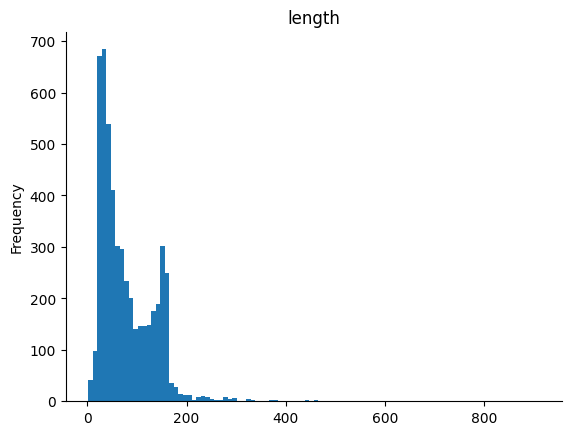

In [15]:
from matplotlib import pyplot as plt
df['length'].plot(kind='hist', bins=100, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

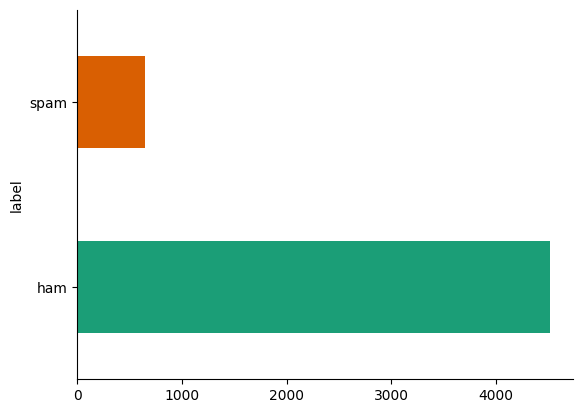

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-4b544ea66516>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='length', y='label', inner='box', palette='Dark2')


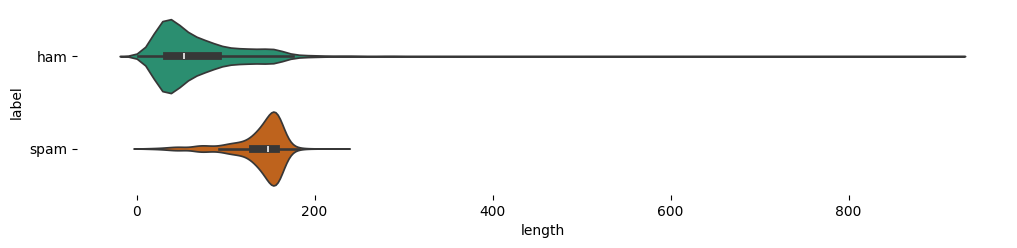

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='length', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 1 | Data Preprocessing
## Prepare the dataset before training

In [18]:
import string
STOPWORDS = stopwords.words('english')

def clean_messages(message):
    remove_punctuation = [char for char in message if char not in string.punctuation]

    remove_punctuation = ''.join(remove_punctuation)
    remove = remove_punctuation.lower()

    clean_msg = [word for word in remove.split() if word.lower() not in STOPWORDS]
    clean_msg = ' '.join(clean_msg)
    return clean_msg

cleaned_text = []
for t in df['message']:
    cleaned_text.append(clean_messages(t))

In [19]:
df['cleaned_message']=cleaned_text

In [20]:
df.head()

,label,message,length,word_count,sentence_count,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goes usf lives around though


In [21]:
for i in range(5):
    print("label:",df['label'][i])
    print("message:",df['cleaned_message'][i])
    print("\n")

label: ham
message: go jurong point crazy available bugis n great world la e buffet cine got amore wat


label: ham
message: ok lar joking wif u oni


label: spam
message: free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s


label: ham
message: u dun say early hor u c already say


label: ham
message: nah dont think goes usf lives around though




In [22]:
#word cloud
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color ='white')

In [23]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [24]:
spam_wc = wc.generate(df[df['label']==1]['cleaned_message'].str.cat(sep=" "))

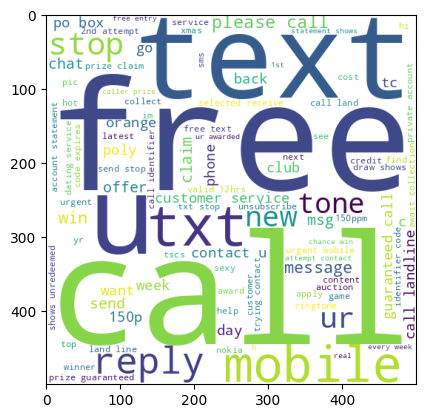

In [25]:
plt.imshow(spam_wc)

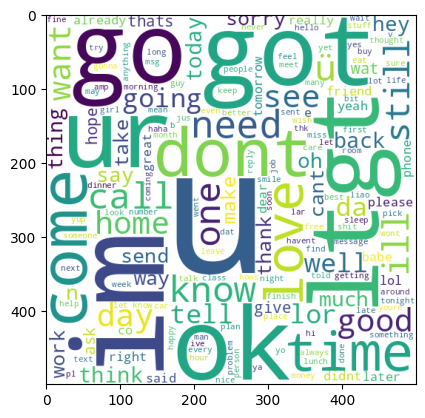

In [26]:
ham_wc = wc.generate(df[df['label']==0]['cleaned_message'].str.cat(sep=" "))
plt.imshow(ham_wc)

## Train test split

In [27]:
df.head()

,label,message,length,word_count,sentence_count,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goes usf lives around though


In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [29]:
tfidf = TfidfVectorizer(max_features=3000)

In [30]:
from sklearn.model_selection import train_test_split

X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test shapes  : X = {X_test.shape},  y = {y_test.shape}\n")

Train shapes : X = (4128, 3000), y = (4128,)
Test shapes  : X = (1032, 3000),  y = (1032,)



## Defining the models and Training them

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [36]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709302325581395, 0.9387755102040817)

In [38]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

# Evaluating Accuracy

In [39]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision- ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709302325581395
Precision-  0.9387755102040817
For  KN
Accuracy -  0.9215116279069767
Precision-  1.0
For  NB
Accuracy -  0.9718992248062015
Precision-  1.0
For  DT
Accuracy -  0.9428294573643411
Precision-  0.8352941176470589
For  LR
Accuracy -  0.9505813953488372
Precision-  0.8350515463917526
For  RF
Accuracy -  0.9757751937984496
Precision-  0.9789473684210527
For  AdaBoost
Accuracy -  0.9602713178294574
Precision-  0.8571428571428571
For  BgC
Accuracy -  0.9525193798449613
Precision-  0.8018018018018018
For  ETC
Accuracy -  0.9748062015503876
Precision-  0.9411764705882353
For  GBDT
Accuracy -  0.9593023255813954
Precision-  0.9021739130434783
For  xgb
Accuracy -  0.9680232558139535
Precision-  0.9278350515463918


In [45]:
perform_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000ft':accuracy_scores,'Precision_3000ft':precision_scores}).sort_values('Precision_3000ft',ascending=False)

In [46]:
perform_df

,Algorithm,Accuracy_3000ft,Precision_3000ft
1,KN,0.921512,1.000000
2,NB,0.971899,1.000000
5,RF,0.975775,0.978947
8,ETC,0.974806,0.941176
0,SVC,0.970930,0.938776
10,xgb,0.968023,0.927835
9,GBDT,0.959302,0.902174
6,AdaBoost,0.960271,0.857143
3,DT,0.942829,0.835294
4,LR,0.950581,0.835052


In [47]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

## Make predictions